<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [2]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [3]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

<ipython-input-3-b7d446354769>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


This function is to plot the confusion matrix.


In [4]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'landed']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [5]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

In [6]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [7]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

In [8]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [9]:
# Select the 'Class' column as a Series and convert it to a NumPy array
Y = data['Class'].to_numpy()

# Display the output
print(Y)

[0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [10]:
# Initialize the StandardScaler
transform = preprocessing.StandardScaler()

# Fit the scaler to the data and transform it
X = transform.fit_transform(X)

# Display the transformed data
print(X)

[[-1.71291154e+00 -1.94814463e-16 -6.53912840e-01 ... -8.35531692e-01
   1.93309133e+00 -1.93309133e+00]
 [-1.67441914e+00 -1.19523159e+00 -6.53912840e-01 ... -8.35531692e-01
   1.93309133e+00 -1.93309133e+00]
 [-1.63592675e+00 -1.16267307e+00 -6.53912840e-01 ... -8.35531692e-01
   1.93309133e+00 -1.93309133e+00]
 ...
 [ 1.63592675e+00  1.99100483e+00  3.49060516e+00 ...  1.19684269e+00
  -5.17306132e-01  5.17306132e-01]
 [ 1.67441914e+00  1.99100483e+00  1.00389436e+00 ...  1.19684269e+00
  -5.17306132e-01  5.17306132e-01]
 [ 1.71291154e+00 -5.19213966e-01 -6.53912840e-01 ... -8.35531692e-01
  -5.17306132e-01  5.17306132e-01]]


We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [11]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Display the shapes of the resulting datasets to confirm the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (72, 83)
X_test shape: (18, 83)
Y_train shape: (72,)
Y_test shape: (18,)


we can see we only have 18 Y_test samples.


In [31]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [13]:
# Define the hyperparameters to tune
parameters = {'C': [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']}  # NOTE: l1 lasso; l2 ridge

# Initialize the logistic regression model
lr = LogisticRegression()

# Create the GridSearchCV object with 10-fold cross-validation
logreg_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10)

# Fit the GridSearchCV object to the training data
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [14]:
# Display the best parameters and the best accuracy score
print("Tuned hyperparameters (best parameters):", logreg_cv.best_params_)
print("Accuracy:", logreg_cv.best_score_)

Tuned hyperparameters (best parameters): {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.8464285714285713


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [15]:
# Calculate the accuracy on the test data
test_accuracy = logreg_cv.score(X_test, Y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8333333333333334


Lets look at the confusion matrix:


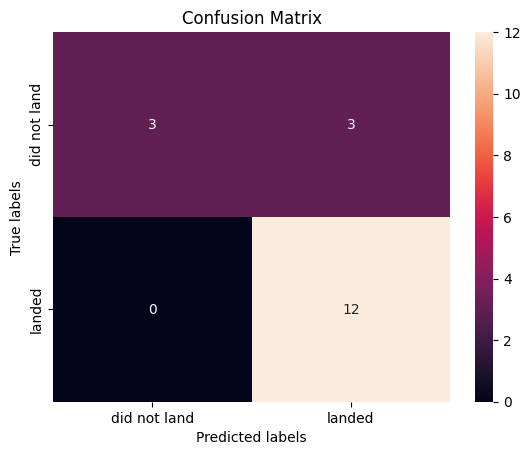

In [16]:
# Make predictions on the test data
yhat = logreg_cv.predict(X_test)

# Plot the confusion matrix
plot_confusion_matrix(Y_test, yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)

---

### Confusion Matrix Analysis

The confusion matrix for the logistic regression model shows the following results:

- **True Positives (TP)**: 12  
  - The model correctly predicted "landed" when the true label was "landed."
- **False Positives (FP)**: 3  
  - The model predicted "landed" when the true label was "did not land."
- **True Negatives (TN)**: 3  
  - The model correctly predicted "did not land" when the true label was "did not land."
- **False Negatives (FN)**: 0  
  - No instances occurred where the model predicted "did not land" when the true label was "landed."

### Overview

The logistic regression model demonstrates the ability to distinguish between different classes. However, some **false positives** are present, where the model incorrectly predicts "landed" for cases that did not land.

- **True Positive (Landed)**: 12
- **False Positive (Did not land predicted as landed)**: 3

Overall, the model achieves a high true positive rate for "landed" but exhibits some challenges with **false positives** in the "landed" prediction.




## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [17]:
# Define the hyperparameters to tune
parameters = {
    'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid'),
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}

# Initialize the SVM model
svm = SVC()

# Create the GridSearchCV object with 10-fold cross-validation
svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv=10)

# Fit the GridSearchCV object to the training data
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [18]:
# Display the best parameters and the best accuracy score
print("Tuned hyperparameters (best parameters):", svm_cv.best_params_)
print("Accuracy:", svm_cv.best_score_)

Tuned hyperparameters (best parameters): {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Accuracy: 0.8482142857142856


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [19]:
# Calculate the accuracy on the test data
test_accuracy = svm_cv.score(X_test, Y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8333333333333334


We can plot the confusion matrix


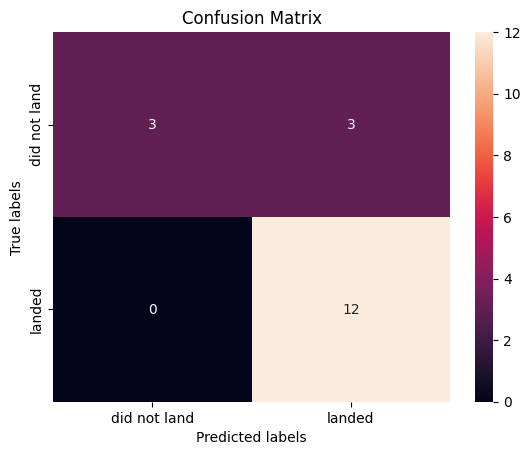

In [20]:
# Make predictions on the test data
yhat = svm_cv.predict(X_test)

# Plot the confusion matrix
plot_confusion_matrix(Y_test, yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune, excluding 'auto' from max_features
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2 * n for n in range(1, 10)],
    'max_features': ['sqrt', 'log2'],  # Removed'auto' for causing errors - no longer valid
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Decision Tree classifier
tree = DecisionTreeClassifier()

# Create the GridSearchCV object with 10-fold cross-validation
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10)

# Fit the GridSearchCV object to the training data
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [22]:
# Display the best parameters and the best accuracy score
print("Tuned hyperparameters (best parameters):", tree_cv.best_params_)
print("Accuracy:", tree_cv.best_score_)

Tuned hyperparameters (best parameters): {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
Accuracy: 0.875


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [23]:
# Calculate the accuracy on the test data
test_accuracy = tree_cv.score(X_test, Y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9444444444444444


We can plot the confusion matrix


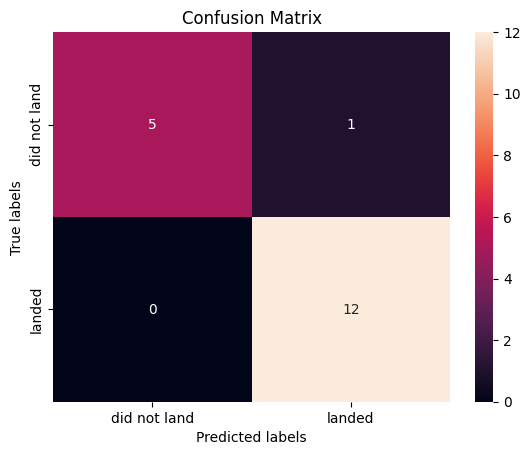

In [24]:
# Make predictions on the test data
yhat = tree_cv.predict(X_test)

# Plot the confusion matrix
plot_confusion_matrix(Y_test, yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [25]:
# Define the hyperparameters to tune
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Initialize the KNN classifier
KNN = KNeighborsClassifier()

# Create the GridSearchCV object with 10-fold cross-validation
knn_cv = GridSearchCV(estimator=KNN, param_grid=parameters, cv=10)

# Fit the GridSearchCV object to the training data
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [26]:
# Display the best parameters and the best accuracy score
print("Tuned hyperparameters (best parameters):", knn_cv.best_params_)
print("Accuracy:", knn_cv.best_score_)

Tuned hyperparameters (best parameters): {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Accuracy: 0.8482142857142858


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [27]:
# Calculate the accuracy on the test data
test_accuracy = knn_cv.score(X_test, Y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8333333333333334


We can plot the confusion matrix


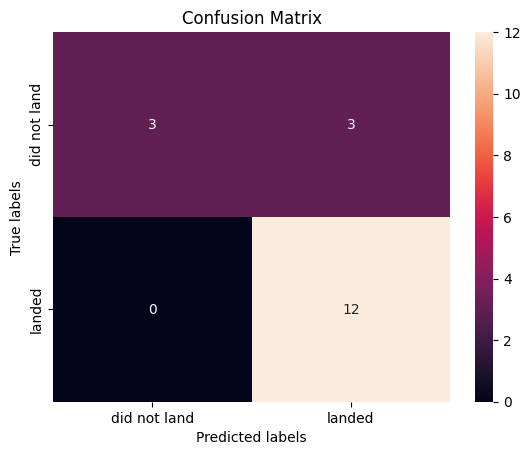

In [28]:
# Make predictions on the test data
yhat = knn_cv.predict(X_test)

# Plot the confusion matrix
plot_confusion_matrix(Y_test, yhat)

## TASK  12


Find the method performs best:


### Model Performance Comparison

The following table shows the accuracy of each model on the test data:

- **Logistic Regression**: `logreg_cv.best_score_`
- **Support Vector Machine (SVM)**: `svm_cv.best_score_`
- **Decision Tree**: `tree_cv.best_score_`
- **K-Nearest Neighbors (KNN)**: `knn_cv.best_score_`

The model with the highest accuracy on the test data is considered the best-performing method.


#### Visualize the accuracy of all built classification models in a bar chart and identify the model with the highest classification accuracy

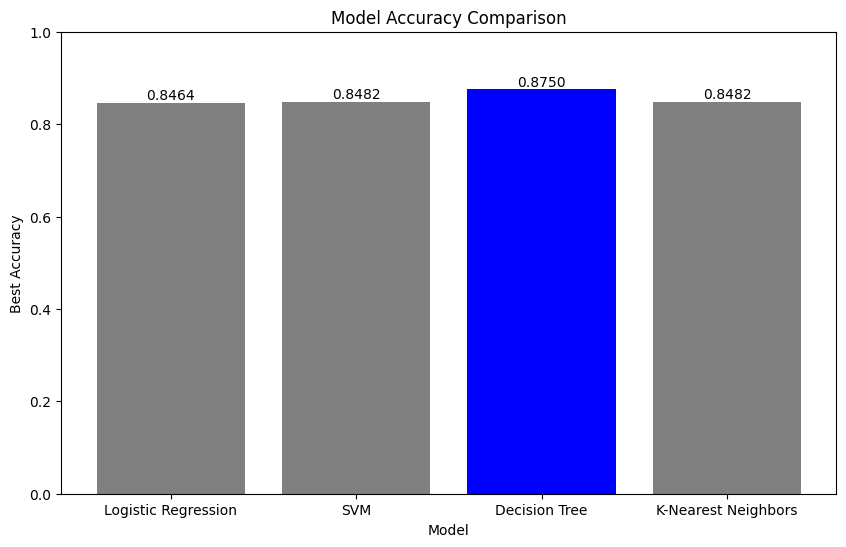

Model Performance Comparison:


,Model,Best Accuracy
0,Logistic Regression,0.846429
1,SVM,0.848214
2,Decision Tree,0.875000
3,K-Nearest Neighbors,0.848214


The best-performing model is: Decision Tree with an accuracy of 0.8750


In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Model names and their corresponding best accuracies
model_performance = {
    "Model": ["Logistic Regression", "SVM", "Decision Tree", "K-Nearest Neighbors"],
    "Best Accuracy": [
        logreg_cv.best_score_,
        svm_cv.best_score_,
        tree_cv.best_score_,
        knn_cv.best_score_,
    ]
}

# Create a DataFrame
performance_df = pd.DataFrame(model_performance)

# Find the index of the best-performing model
best_index = performance_df["Best Accuracy"].idxmax()

# Set colors: blue for the best model, gray for others
colors = ["blue" if i == best_index else "gray" for i in range(len(performance_df))]

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(performance_df["Model"], performance_df["Best Accuracy"], color=colors)
plt.xlabel("Model")
plt.ylabel("Best Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)  # Set y-axis range to [0, 1] for better comparison

# Add accuracy labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height, f'{height:.4f}',
        ha='center', va='bottom'
    )

plt.show()

# Display the performance dataframe
print("Model Performance Comparison:")
display(performance_df)

# Display the best-performing model
best_model = performance_df.loc[best_index]
print(f"The best-performing model is: {best_model['Model']} with an accuracy of {best_model['Best Accuracy']:.4f}")


### Show the confusion matrix of the best performing model

Test Accuracy: 0.9444444444444444


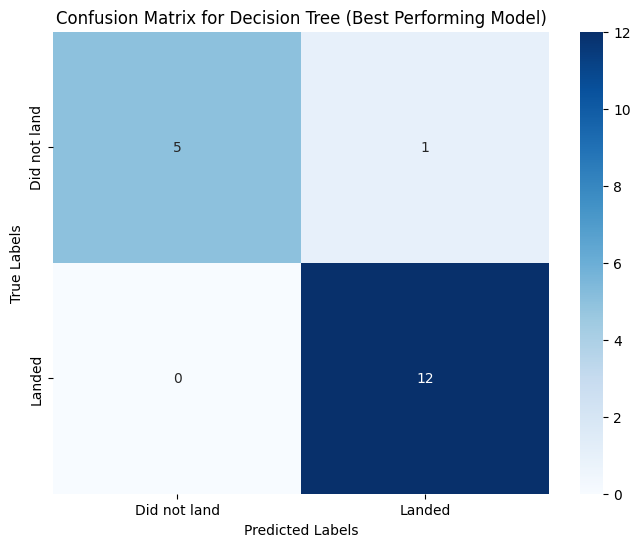

In [30]:
from sklearn.metrics import confusion_matrix

# Calculate the accuracy on the test data
test_accuracy = tree_cv.score(X_test, Y_test)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test data
yhat = tree_cv.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(Y_test, yhat)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Did not land', 'Landed'], yticklabels=['Did not land', 'Landed'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Decision Tree (Best Performing Model)")
plt.show()


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
